# Activity 5: Extracting data from Twitter

Extract tweets using tweepy library having hashtag '#pulwamaattack' and do the following <br>
i) Filter out the ones which are written in english <br>
ii) Calculate sentiment score for each of them using textblob library <br>
iii) Visualize these tweets using word cloud having at most 100 words <br>

In [3]:
#!pip install tweepy

Login to twitter <br>
Go to https://developer.twitter.com/en/apps <br>
Create an app <br>
Once app is created, Go to 'Keys and tokens' tab; copy consumer_key, consumer_secret, access_token, access_token_secret from there  <br>

In [5]:
consumer_key = 'your consumer key here'
consumer_secret = 'your consumer secret key here'
access_token = 'your access token here'
access_token_secret = 'your access token secret here'

In [66]:
import pandas as pd
import numpy as np
import pickle
import json
from pprint import pprint
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [57]:
import tweepy

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [ ]:
tweet_list = []
for tweet in tweepy.Cursor(api.search, q='#pulwamaattack', rpp=100).items():
    tweet_list.append(tweet)

In [13]:
len(tweet_list)

1681

In [34]:
tweet_list[0]

Status(_api=<tweepy.api.API object at 0x11106bcc0>, _json={'created_at': 'Thu Feb 28 17:11:06 +0000 2019', 'id': 1101167924033671168, 'id_str': '1101167924033671168', 'text': 'RT @noconversion: How many Pakistani people are getting medical care in Indian hospitals? Why are they still allowed after #PulwamaAttack ?…', 'truncated': False, 'entities': {'hashtags': [{'text': 'PulwamaAttack', 'indices': [123, 137]}], 'symbols': [], 'user_mentions': [{'screen_name': 'noconversion', 'name': 'No Conversion', 'id': 2823192415, 'id_str': '2823192415', 'indices': [3, 16]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2730222397, 'id_str': '2730222397', 'name': 'Keshav Ashwin Kumar', 'screen_na

In [33]:
status = tweet_list[0]
json_str = json.dumps(status._json)
pprint(json.loads(json_str))

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Feb 28 17:11:06 +0000 2019',
 'entities': {'hashtags': [{'indices': [123, 137], 'text': 'PulwamaAttack'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 2823192415,
                                 'id_str': '2823192415',
                                 'indices': [3, 16],
                                 'name': 'No Conversion',
                                 'screen_name': 'noconversion'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1101167924033671168,
 'id_str': '1101167924033671168',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 80,
 'retweeted': False,
 'retweeted_status': {'contributor

In [35]:
json.loads(json_str)['text']

'RT @noconversion: How many Pakistani people are getting medical care in Indian hospitals? Why are they still allowed after #PulwamaAttack ?…'

In [39]:
tweet_text = []
for i in range(0,len(tweet_list)):
    status = tweet_list[i]
    json_str = json.dumps(status._json)
    tweet_text.append(json.loads(json_str)['text'])

In [43]:
unique_tweet_text = list(set(tweet_text))

## Creating dataframe consists of texts of tweets

In [45]:
tweet_text_df = pd.DataFrame({'tweet_text' : unique_tweet_text})
tweet_text_df.head()

,tweet_text
0,RT @Sharanyashettyy: @Malala Wake me up when y...
1,RT @rsrobin1: Two crowd sourced videos from #S...
2,@ZeeNewsHindi He praised Imran khan during #Pu...
3,RT @Kheezranjilani: #Pakistan #India - Nafrat ...
4,RT @Iypan8: @RahulGandhi @SitaramYechury @Mama...


In [47]:
tweet_text_df['language_detected'] = tweet_text_df['tweet_text'].apply(lambda x : \
                                                                       str(TextBlob('u'+str(x)).detect_language()))

In [54]:
tweet_text_df.head(20)

,tweet_text,language_detected
0,RT @Sharanyashettyy: @Malala Wake me up when y...,en
1,RT @rsrobin1: Two crowd sourced videos from #S...,en
2,@ZeeNewsHindi He praised Imran khan during #Pu...,en
3,RT @Kheezranjilani: #Pakistan #India - Nafrat ...,en
4,RT @Iypan8: @RahulGandhi @SitaramYechury @Mama...,en
5,RT @iam_alpu: मेरे जज्बातों से मेरा कलम इस कदर...,hi
6,RT @KSakarwar: If @PMOIndia NotDoingFullScale ...,en
7,RT @godfatheriv: It was a treat to listen to H...,en
8,RT @VocalHindustani: @ashutosh83B @sachin_rt #...,en
9,RT @Alisha56723982: हमे तो पक्का यकीन है !\n\n...,hi


## Filter out the english tweets

In [49]:
tweet_text_df[tweet_text_df['language_detected']!='en']

,tweet_text,language_detected
5,RT @iam_alpu: मेरे जज्बातों से मेरा कलम इस कदर...,hi
9,RT @Alisha56723982: हमे तो पक्का यकीन है !\n\n...,hi
10,"24 విమానాలతో భారత భూభాగంలోకి పాకిస్తాన్, అడ్డు...",te
16,RT @newsonepk: کیا عالمی برادری اب پاکستان کی ...,ur
17,एक लाख से भी ज्यादा अच्छाई है आपमें प्रधानमंत्...,hi
23,RT @aksshr10: @TajinderBagga यह पाकिस्तान जितन...,hi
27,RT @chikki_2244: बेटी घर नहीं छोड़ती \n\nकुछ ब...,hi
30,@fajerrabia @EncapsulatdSoul @narendramodi @sa...,bn
36,@RajThackeray @mnsadhikrut \nदेशाची माफी कधी म...,mr
37,अभिनंदन की आड़ में पाकिस्तान बचने की कोशिश कर ...,hi


In [56]:
tweet_text_df_eng = tweet_text_df[tweet_text_df['language_detected']=='en']
tweet_text_df_eng.shape

(319, 2)

## Extract sentiment scores of the english tweets using textblob

In [59]:
tweet_text_df_eng['sentiment_score'] = tweet_text_df_eng['tweet_text'].apply(lambda x: str(TextBlob('u'+str(x)).sentiment.polarity))
pd.set_option('display.max_colwidth', -1)
tweet_text_df_eng[['tweet_text', 'sentiment_score']].head(20)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tweet_text,sentiment_score
0,RT @Sharanyashettyy: @Malala Wake me up when you have tweeted #SayNoToTerrorism after the ghastly #PulwamaAttack. .if not her words hold no…,0.0
1,RT @rsrobin1: Two crowd sourced videos from #Sialkot and #Lahore indicate what happened yesterday in Pakistan which led to scare their own…,0.0
2,"@ZeeNewsHindi He praised Imran khan during #PulwamaAttack , so we can imagine his mindset 😬.",0.0
3,RT @Kheezranjilani: #Pakistan #India - Nafrat Ka Ilaj https://t.co/G2gNzodfOn MUST WATCH VIDEO for ALL people living in India &amp; Pakistan a…,0.0
4,"RT @Iypan8: @RahulGandhi @SitaramYechury @MamataOfficial @jothims My Speculation\n#PulwamaAttack may have been planned intentionally, for a…",0.0
6,RT @KSakarwar: If @PMOIndia NotDoingFullScale #War for #PakistanOccupiedKashmir #BREAKING #Pakistan BeingBusyIn #PseudoWar &amp; #MeraBoothSab…,0.0
7,"RT @godfatheriv: It was a treat to listen to Hina Khar on the BBC. Clear, Concise and composed. Better than all woke Journos put together.…",0.2333333333333333
8,RT @VocalHindustani: @ashutosh83B @sachin_rt #DeshDrohis like @sachin_rt &amp; #SunilGavaskar are more interested in India-Pak matches so that…,0.375
11,Mr Bagga's narrative apart; listen to what Mr @ArvindKejriwal is trying to say and ponder. #PulwamaAttack;… https://t.co/J90V5lqObT,0.0
12,"RT @Schizohazel: This man is gem, no matter what, humanity is more then anything.👏\n#GayHind #PulwamaAttack https://t.co/O78TIblcbG",0.5


## Creating word cloud

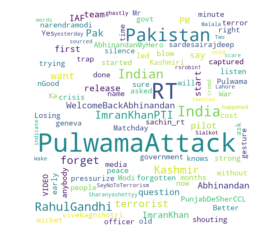

In [68]:
other_stopwords_to_remove = ['https', 'amp','co']
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)

text=tweet_text_df_eng["tweet_text"]
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=100,
                stopwords = stopwords, 
                min_font_size = 10).generate(str(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()